博士段房价预测案例--特征工程
通过数据探索，我们了解了数据集的特点，接下来我们进行特征工程，对原始特征做必要的数据预处理和特征编码，使得变化后的特征符合模型要求

# 1.导入必要的包 

In [59]:
# -*- coding:utf-8 -*-
import sys
#矩阵操作
import numpy as np
#处理csv文件 SQL数据处理
import pandas as pd

#画直方图用，对数据结果进行可视化
import matplotlib.pyplot as plt
#对matplotlib进行一次封装，画图更容易，使用更方便
import seaborn as sns


# 2.波士顿房价预测
读入特征工程后的文件

In [60]:
#波士顿房价预测
data_path = "/home/tianyu/software/IDEAProjects/machine_learning/FE_boston_housing.csv"

#读取数据
df = pd.read_csv(data_path)
#显示前五行，了解每列（特征）的情况
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,...,RAD_2,RAD_3,RAD_4,RAD_5,RAD_6,RAD_7,RAD_8,RAD_24,MEDV,LOGMEDV
0,-0.419782,0.285654,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.666608,-1.353192,...,0,0,0,0,0,0,0,0,24.0,3.218876
1,-0.417339,-0.487292,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.987329,-0.475352,...,1,0,0,0,0,0,0,0,21.6,3.117950
2,-0.417342,-0.487292,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.987329,-0.475352,...,1,0,0,0,0,0,0,0,34.7,3.575151
3,-0.416750,-0.487292,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-1.106115,-0.036432,...,0,1,0,0,0,0,0,0,33.4,3.538057
4,-0.412482,-0.487292,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-1.106115,-0.036432,...,0,1,0,0,0,0,0,0,36.2,3.616309


In [32]:
#数据的总体信息
#一共包含多少个样本点，一共多少列，列的名字，非空数值，数据类型
#X 需要是一个数值，方便处理，对字符串的需要进行编码，才能送到数据模型中
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 23 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
RAD_1      506 non-null int64
RAD_2      506 non-null int64
RAD_3      506 non-null int64
RAD_4      506 non-null int64
RAD_5      506 non-null int64
RAD_6      506 non-null int64
RAD_7      506 non-null int64
RAD_8      506 non-null int64
RAD_24     506 non-null int64
MEDV       506 non-null float64
LOGMEDV    506 non-null float64
dtypes: float64(14), int64(9)
memory usage: 91.0 KB


    3.2 数据分离
从特征数据中分离输入特征 X 和标签 y

In [61]:
#分离数据X和y
y = df['MEDV']
X = df.drop(['MEDV', 'LOGMEDV'], axis = 1)

#特征名称，对后续显示权重系数对应的特征
feat_names = X.columns

In [62]:
#对数据进行分离，分出训练数据和测试数据
from sklearn.model_selection import train_test_split

X_train_data, X_test_data, y_train_data, y_test_data = train_test_split(X, y, test_size=0.2, random_state=30)

In [63]:
# 确定模型选择
## 尝试缺省参数的线性回归
from sklearn.linear_model import LinearRegression
#使用默认配置，不添加参数
lr = LinearRegression()
#训练模型
lr.fit(X_train_data, y_train_data)
#预测模型
y_pred_train_data = lr.predict(X_train_data)
y_pred_test_data = lr.predict(X_test_data)

# 看看个特征的权重新书，系统的绝对值大小可视化该特征的重要性

fs = pd.DataFrame({"columns":list(feat_names), "coef":list((lr.coef_.T))})
fs.sort_values(by=['coef'], ascending=False)

,columns,coef
20,RAD_24,4.155386
18,RAD_7,3.212922
19,RAD_8,2.487054
5,RM,2.456106
1,ZN,1.331782
14,RAD_3,0.807168
3,CHAS,0.734163
10,B,0.690663
2,INDUS,0.199674
6,AGE,0.185870


In [64]:
from sklearn.metrics import r2_score  #评价回归预测模型的性能
## 模型评价
print("The r2 score of LinearRegression on train data is", r2_score(y_train_data, y_pred_train_data))
print("The r2 score of LinearRegression on test data is", r2_score(y_test_data, y_pred_test_data))

The r2 score of LinearRegression on train data is 0.7539084379866171
The r2 score of LinearRegression on test data is 0.691383467005563


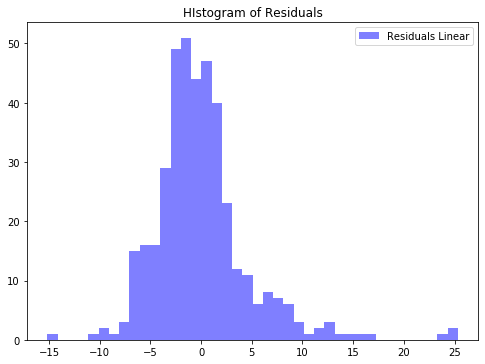

In [65]:
#在训练集上观察预测参差的分布，看是否符合模型假设，噪声为0均值的高斯噪声
f, ax = plt.subplots(figsize=(7, 5))
f.tight_layout()
ax.hist(y_train_data - y_pred_train_data, bins = 40, label="Residuals Linear", color='b', alpha=.5)
ax.set_title("HIstogram of Residuals")
ax.legend(loc="best")

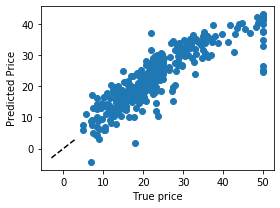

In [66]:
#观察预测值和真值之间的散点图
plt.figure(figsize = (4, 3))
plt.scatter(y_train_data, y_pred_train_data)
#数据已经标准化，三倍标准差即可
plt.plot([-3, 3], [-3, 3], '--k')
plt.axis('tight')
plt.xlabel('True price')
plt.ylabel('Predicted Price')
plt.tight_layout()

In [67]:
#正则化的线性回归 （L2正则--》岭回归）
from sklearn.linear_model import RidgeCV
#1. 设置超参数（正则参数）的范围
alphas = [0.01, 0.1, 1, 10, 100]
#2.生成一个RidgeCV实例
ridge = RidgeCV(alphas = alphas, store_cv_values = True)

#3. 模型训练
ridge.fit(X_train_data, y_train_data)

#4. 预测
y_pred_train_data_ridge = ridge.predict(X_train_data)
y_pred_test_data_ridge = ridge.predict(X_test_data)
#评估，使用r2_score评价模型性能
print("The r2 score of RidgeCV on train data is", r2_score(y_train_data, y_pred_train_data_ridge))
print("The r2 score of RidgeCV on test data is", r2_score(y_test_data, y_pred_test_data_ridge))

The r2 score of RidgeCV on train data is 0.7537497752485548
The r2 score of RidgeCV on test data is 0.697443866035468


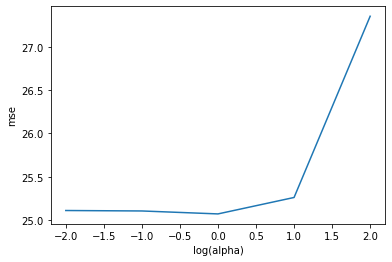

alphas is: 1.0


In [68]:
#可视化
mse_mean = np.mean(ridge.cv_values_, axis = 0)
plt.plot(np.log10(alphas), mse_mean.reshape(len(alphas), 1))

plt.xlabel("log(alpha)")
plt.ylabel("mse")
plt.show()

print("alphas is:", ridge.alpha_)

In [69]:
# 看看个特征的去赞中系统，系统的绝对值大小可视为对该特征的重要性
fs = pd.DataFrame({"columns":list(feat_names), "coef_lr":list((lr.coef_.T)), "coef_ridge":list((ridge.coef_.T))})
fs.sort_values(by=['coef_lr'],ascending=False)

,columns,coef_lr,coef_ridge
20,RAD_24,4.155386,3.721747
18,RAD_7,3.212922,2.876220
19,RAD_8,2.487054,2.360835
5,RM,2.456106,2.494506
1,ZN,1.331782,1.281489
14,RAD_3,0.807168,0.883882
3,CHAS,0.734163,0.748869
10,B,0.690663,0.686843
2,INDUS,0.199674,0.140838
6,AGE,0.185870,0.153427


In [70]:
#正则化的线性回归（L1正则 --》 Lasso）

from sklearn.linear_model import LassoCV

#生成实例
lasso = LassoCV()
#训练
lasso.fit(X_train_data, y_train_data)
#预测
y_pred_train_data_lasso = lasso.predict(X_train_data)
y_pred_test_data_lasso = lasso.predict(X_test_data)

# 评估，使用r2_score评价模型在测试集和训练集上的性能
print('The r2 score of LassoCV on train is', r2_score(y_train_data, y_pred_train_data_lasso))
print('The r2 score of LassoCV on test is', r2_score(y_test_data, y_pred_test_data_lasso))

The r2 score of LassoCV on train is 0.7537250176099198
The r2 score of LassoCV on test is 0.6977915249872964


/home/tianyu/.local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


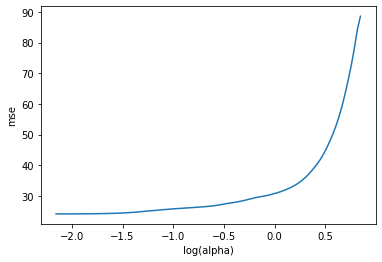

alpha is: 0.0069932844085880954


In [71]:
mses = np.mean(lasso.mse_path_, axis = 1)
plt.plot(np.log10(lasso.alphas_), mses) 
#plt.plot(np.log10(lasso.alphas_)*np.ones(3), [0.3, 0.4, 1.0])
plt.xlabel('log(alpha)')
plt.ylabel('mse')
plt.show()    
            
print ('alpha is:', lasso.alpha_)

In [72]:
# 看看各特征的权重系数，系数的绝对值大小可视为该特征的重要性
fs = pd.DataFrame({"columns":list(feat_names), "coef_lr":list((lr.coef_.T)), "coef_ridge":list((ridge.coef_.T)), "coef_lasso":list((lasso.coef_.T))})
fs.sort_values(by=['coef_lr'],ascending=False)

,columns,coef_lr,coef_ridge,coef_lasso
20,RAD_24,4.155386,3.721747,4.577367
18,RAD_7,3.212922,2.876220,3.701791
19,RAD_8,2.487054,2.360835,3.141232
5,RM,2.456106,2.494506,2.492505
1,ZN,1.331782,1.281489,1.262882
14,RAD_3,0.807168,0.883882,1.640102
3,CHAS,0.734163,0.748869,0.747080
10,B,0.690663,0.686843,0.681839
2,INDUS,0.199674,0.140838,0.096352
6,AGE,0.185870,0.153427,0.132963
